## 서설

머신러닝중 많이 쓰는건 추천

4문제는 시험, 1문제는 실습(추천)

영화 추천, 사용자 지정하면 영화 추천

잠재 협업 필터링, 이용자 기반, 패키지 존재 surprise https://big-dream-world.tistory.com/70

자연어 처리 - 트랜스포머 

프로젝트 챗봇 - ai agent 솔루션을 만드는 것, 전문적인 조언과 인터렉티브한 역할을 하는 에이젼트를 만드는 것이 목표, 따라서 openai 의 api 사용해야 할 수 밖에 없음, 

자연어 처리는 gpt2를 기준으로 할 것, 

gtp4o mini 사용 - 개발자를 위해 올해 9월까지 100만 토큰 이하는 무료, 파인튜닝을 해야하기 때문에 데이터를 만들어서 학습을 시켜야함, 파인튜닝 데이터를 만들어서 학습해야하는데 그런 가이드는 없음, 

라마3 - 오픈소스, 

우리는 둘 다 사용할 줄 알아야한다. gpt2를 직접 사용하는것도 프로젝트에 적용하는 것도 괜찮다.

3차 프로젝트는 영상이미지 인식, open cv 를 종합해서 하는 프로젝트를 할 것이다.

멀티모달 - gtp4o mini 사용할 수 있다.

파인튜닝 부분은 기업들도 많이 시도 못하는 부분이다. 경험해본 사람이 많지 않다.

파인튜닝 데이터 만드는 것을 해보는 것이 중요할 것, chat completion을 해보는 것이 중요할 것, 

2차 프로젝트는 8월 12일 시작해서 9월12일 제출

Task1_0729. Target Column의 분포를 확인하고 다음 사항을 수행하세요.

- Target은 로그변환하고 X 변수들을 표준화한 후 모델 학습 및 평가
- 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
- 이상치 처리 전후에 대한 모델 평가 결과 비교 설명

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(20640,)


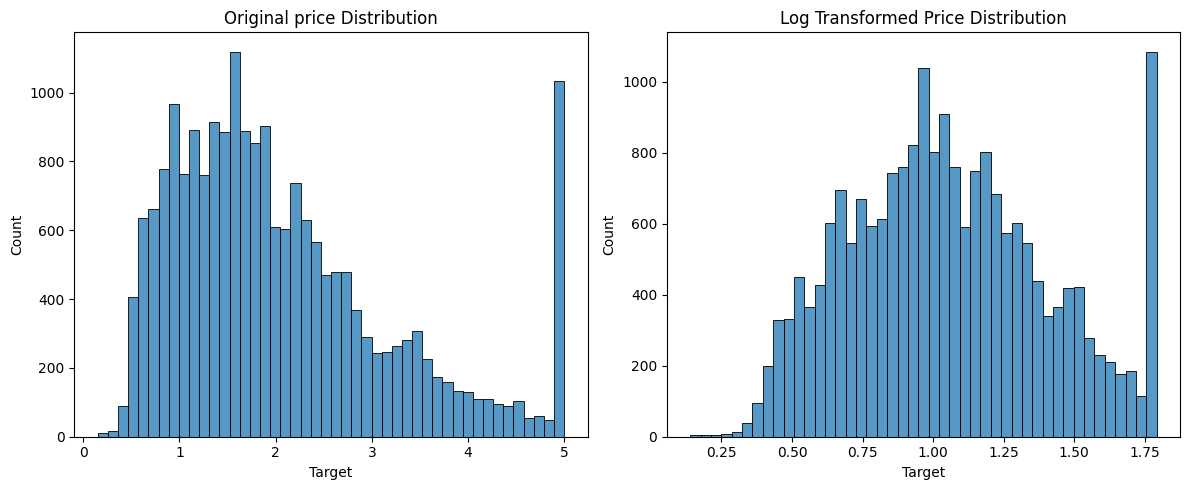

In [10]:
# histplot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

sns.histplot(df['Target'], ax=axs[0])
axs[0].set_title('Original price Distribution')

y_log = np.log1p(df['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')
print(y_log.shape)
plt.tight_layout()
plt.show()

In [3]:
# Target은 로그변환하고 X 변수들을 표준화한 후 모델 학습 및 평가

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y

y_log = np.log1p(df["Target"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'Mean Squated Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squated Error: 1156.3347
Mean Absolute Error: 33.7473
R^2 Score: -9172.6876


In [48]:
# 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)

def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound), median, df[column]
    )
    return df

for i in df.columns:
    replace_outliers_with_median(df, i)

In [30]:
df['AveRooms'].describe()

count    20640.000000
mean         5.238561
std          1.139756
min          2.032738
25%          4.447368
50%          5.229129
75%          5.960233
max          8.469738
Name: AveRooms, dtype: float64

In [27]:
df['AveBedrms'].describe()

count    20640.000000
mean         1.048191
std          0.063783
min          0.866013
25%          1.007732
50%          1.048780
75%          1.084706
max          1.239521
Name: AveBedrms, dtype: float64

In [ ]:
y

In [49]:
df["Target"] = y

X = df.iloc[:,:-1]
y = df.iloc[:, -1]


y_log = np.log1p(df["Target"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squated Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squated Error: 0.0510
Mean Absolute Error: 0.1715
R^2 Score: 0.5957


이상치 제거후에도 에러가 더 큰것으로 보인다.

## ex

In [6]:
# Target은 로그변환하고 X 변수들을 표준화한 후 모델 학습 및 평가

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y

X = df.drop("Target", axis=1)
y = df["Target"]

y_log = np.log1p(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"계수: {lin_reg.coef_}")
print(f"절편: {lin_reg.intercept_: .4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

계수: [ 0.24186926  0.02627252 -0.07381044  0.09676917  0.0037667  -0.01014244
 -0.34477762 -0.32862179]
절편:  1.0562
Mean Squared Error: 0.0485
Root Mean Squared Error: 0.2203
R^2 Score: 0.6151


다중공선성이 있으면 계수에 영향 미칠 수 있음

회귀계수가 부정확하다는 것은 

각각의 컬럼이 영향을 미치는것이 계수가 부정확, 영향을 미치는 것이 부정확하면, 인사이트를 확인하기 어려움

영향이 적은 컬럼 삭제후 r2 낮아질 수 있음, 결과에는 영향을 미치지 않을 수 있음, 그러나 변수의 계수의 정확도는 달라질 수 있음, 따라서 다중공선성 문제를 최대한 해결해야함

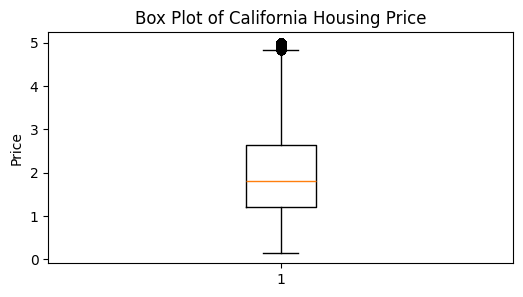

In [7]:
# 이상치 제거후 모델 학습 및 평가

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
y = housing.target

plt.figure(figsize=(6, 3))
plt.boxplot(y)
plt.title("Box Plot of California Housing Price")
plt.ylabel("Price")
plt.show()

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y  # Add the target variable to the DataFrame

# Calculate IQR for the target variable
Q1 = df["Target"].quantile(0.25)
Q3 = df["Target"].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df["Target"] < lower_bound) | (df["Target"] > upper_bound)]

# Output the observations corresponding to outliers
print(len(outliers))
outliers[:5]

1071


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001


In [9]:
# remove the outliers
df_no_outliers = df[(df["Target"] >= lower_bound) & (df["Target"] <= upper_bound)]
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19569 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19569 non-null  float64
 1   HouseAge    19569 non-null  float64
 2   AveRooms    19569 non-null  float64
 3   AveBedrms   19569 non-null  float64
 4   Population  19569 non-null  float64
 5   AveOccup    19569 non-null  float64
 6   Latitude    19569 non-null  float64
 7   Longitude   19569 non-null  float64
 8   Target      19569 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [10]:
df_no_outliers.shape

(19569, 9)

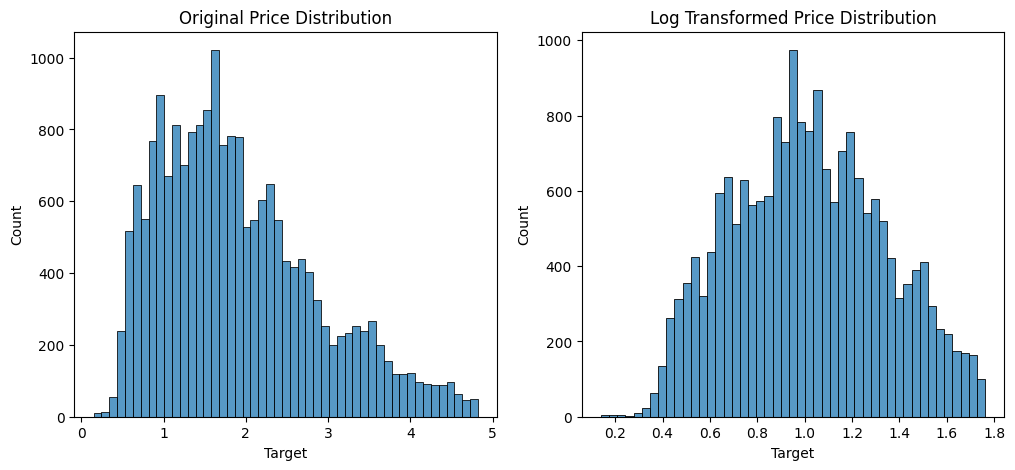

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1행 2열의 서브플롯 생성
fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)

# 원래 PRICE의 분포
sns.histplot(df_no_outliers["Target"], ax=axs[0])
axs[0].set_title("Original Price Distribution")

# 로그 변환된 PRICE의 분포
y_log = np.log1p(df_no_outliers["Target"])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title("Log Transformed Price Distribution")

# 그래프 표시
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 캘리포니아 주택 데이터셋 불러오기

X = df_no_outliers.drop(["Target"], axis=1)
# X = df_no_outliers.drop(['Target','Latitude'], axis=1)
y = df_no_outliers["Target"]

# 타겟 변수에 로그 변환 적용
y_log = np.log1p(y)

# 데이터셋을 DataFrame으로 변환
df = pd.DataFrame(X, columns=housing.feature_names)

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_log, test_size=0.2, random_state=0
)

# 선형 회귀 모델 생성 및 훈련
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R² score

print("계수:", lin_reg.coef_)
print("절편:", lin_reg.intercept_)
print("평균 제곱 오차(MSE):", round(mse, 2))
print("Root Mean Square Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 2))

계수: [ 0.22215106  0.02632994 -0.08906435  0.11029448  0.0058401  -0.01191286
 -0.31453419 -0.29994792]
절편: 1.0169394735212052
평균 제곱 오차(MSE): 0.04
Root Mean Square Error (RMSE): 0.21
R² Score: 0.59


In [ ]:
# 로그 변환만 한것의 결과
계수: [ 0.24186926  0.02627252 -0.07381044  0.09676917  0.0037667  -0.01014244
 -0.34477762 -0.32862179]
절편:  1.0562
Mean Squared Error: 0.0485
Root Mean Squared Error: 0.2203
R^2 Score: 0.6151

Mean Squared Error 는 개선됨, 그러나 R2는 낮아짐 - 그러나 무관

어떤 컬럼이 더 중요한가? 이것이 인사이트 발견을 위한 것

#### 이상치 처리 여부 판단
평균 제곱 오차(MSE)가 향상(감소)됐지만 이상값을 제거한 후 R-제곱 점수가 약간 나빠지는 것을 관찰하면 이는 회귀 모델에 대한 이상값의 미묘한 영향을 나타낸다.

최선의 조치를 해석하고 결정하는 방법

MSE 및 R-제곱 이해:

- MSE는 관찰된 실제 결과와 모델 예측 간의 평균 제곱 차이를 측정. MSE가 낮을수록 평균 오류가 더 작다는 것을 의미하므로 더 나은 적합성을 나타낸다. - 상대적으로 비교할 때 유용하다.
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 `분산 비율`을 측정(추정). 이는 실제 값에 대한 예측 세트의 적합도를 나타낸다. 그러나 R-제곱이 더 높다고 해서 반드시 모델이 더 좋다는 의미는 아니다.

이상치의 영향:
- 이상값을 제거하면 대부분의 데이터 포인트에 대해 모델이 더 정확해져서 MSE가 줄어들 수 있다. 그러나 이상치가 데이터의 특정 측면(이상치가 아님)을 나타내는 경우 이를 제거하면 모델의 일반화가 어려워져 R-제곱이 약간 낮아질 수 있다. - 분석하는 과제에 따라 달리 파악해야할 것, 도메인 지식이 중요

결정 기준:
- 모델 목적: 모델의 목적이 일반적인 사례를 정확하게 예측하는 것이고 이상값이 드물거나 예외적인 경우에는 낮은 MSE에 우선순위를 두는 것이 더 적절할 수 있다.
- 데이터 표현: 이상값이 실제 값이고 데이터의 중요한 변동을 나타내는 경우 더 높은 MSE에도 불구하고 모든 데이터에서 모델 예측 능력의 무결성을 유지하려면 이상값을 유지해야 할 수 있다. - 사안에 ㄸ라 다름

도메인 지식:
- 도메인을 이해하면 이상값이 변칙인지 아니면 데이터의 필수 부분인지에 대한 통찰력을 얻을 수 있다. 예를 들어, 부동산에서는 가치가 매우 높은 부동산이 드물지만 여전히 고려해야 할 중요한 자산이다. 
대체 접근 방식:

결론적으로 `이상값을 제거하거나 유지하는 결정`은 `통계적 증거(iqr), 모델의 목적, 도메인 지식, 모델 사용에 대한 실제 고려 사항의 조합을 기반`으로 해야 한다. 모든 경우에 적용되는 일률적인 답변은 없으며, 종종 가장 좋은 접근 방식은 여러 요소를 고려하고 도메인 전문가와 상담하는 것이다.

Task2_0729. alphas = [0, 0.1, 1, 10, 100]와 같이 주어졌을 때 다음을 수행하세요.
- alpha값에 따른 평균 RMSE
- alpha값에 따른 회귀계수의 변화

In [51]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)
        


In [52]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [56]:
# 릿지 회귀
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop("PRICE", axis=1, inplace=False)
y_target = boston_df["PRICE"]
# 알파가 올라가면 규제가 강해지고, 0이면 규제가 없음
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # 오차는 적을수록 좋기 때문에 neg_mean_squared_error를 사용
    neg_mse_scores = cross_val_score(
        ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5
    )
    # 양수로 전환하기 위해 -1을 곱함
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print(f'알파값 {alpha} 일때 평가 점수:')
    print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
    print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
    print("5 folds의 평균 RMSE: {0:.3f}\n".format(avg_rmse))

알파값 0 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.669 -26.743 -35.541 -85.533 -21.566]
5 folds의 개별 RMSE scores: [3.559 5.171 5.962 9.248 4.644]
5 folds의 평균 RMSE: 5.717

알파값 0.1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.55  -26.568 -35.094 -85.388 -21.502]
5 folds의 개별 RMSE scores: [3.543 5.154 5.924 9.241 4.637]
5 folds의 평균 RMSE: 5.700

알파값 1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.024 -26.691 -33.148 -84.504 -21.339]
5 folds의 개별 RMSE scores: [3.467 5.166 5.757 9.193 4.619]
5 folds의 평균 RMSE: 5.641

알파값 10 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-11.771 -28.005 -32.521 -78.612 -20.685]
5 folds의 개별 RMSE scores: [3.431 5.292 5.703 8.866 4.548]
5 folds의 평균 RMSE: 5.568

알파값 100 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-13.113 -31.629 -40.949 -56.7   -18.679]
5 folds의 개별 RMSE scores: [3.621 5.624 6.399 7.53  4.322]
5 folds의 평균 RMSE: 5.499



In [13]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)


X_data = boston_df.drop("PRICE", axis=1, inplace=False)
y_target = boston_df["PRICE"]
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # 교차 검증 점수 계산
    neg_mse_scores = cross_val_score(
        ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5
    )
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"알파값 {alpha} 일때 평가 점수:")
    print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
    print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
    print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

    # 전체 데이터셋으로 모델 학습 후 회귀계수 구하기
    ridge.fit(X_data, y_target)
    coefficients = ridge.coef_

    print("회귀계수:")
    for name, coef in zip(X_data.columns, coefficients):
        print(f"{name}: {coef:.4f}")
    print("\n")

알파값 0 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.669 -26.743 -35.541 -85.533 -21.566]
5 folds의 개별 RMSE scores: [3.559 5.171 5.962 9.248 4.644]
5 folds의 평균 RMSE: 5.717
회귀계수:
CRIM: -0.0651
ZN: 0.0420
INDUS: -0.0543
CHAS: 3.0838
NOX: -15.3094
RM: 4.1137
AGE: -0.0042
DIS: -1.5021
RAD: 0.0972
TAX: 0.0015
PTRATIO: -0.8228
B: 0.0084
LSTAT: -0.5159


알파값 0.1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.55  -26.568 -35.094 -85.388 -21.502]
5 folds의 개별 RMSE scores: [3.543 5.154 5.924 9.241 4.637]
5 folds의 평균 RMSE: 5.700
회귀계수:
CRIM: -0.0649
ZN: 0.0422
INDUS: -0.0577
CHAS: 3.0641
NOX: -14.3933
RM: 4.1182
AGE: -0.0050
DIS: -1.4882
RAD: 0.0968
TAX: 0.0014
PTRATIO: -0.8134
B: 0.0084
LSTAT: -0.5171


알파값 1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.024 -26.691 -33.148 -84.504 -21.339]
5 folds의 개별 RMSE scores: [3.467 5.166 5.757 9.193 4.619]
5 folds의 평균 RMSE: 5.641
회귀계수:
CRIM: -0.0640
ZN: 0.0432
INDUS: -0.0763
CHAS: 2.9263
NOX: -9.3524
RM: 4.1330
AGE: -0.0092
DIS: -1.4119
RAD: 0.0945
TAX: 

## ex

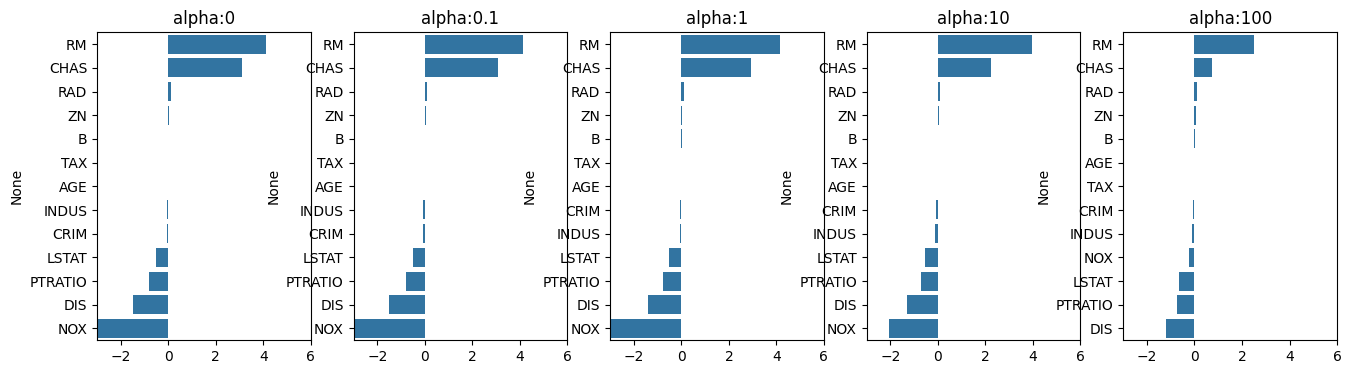

In [14]:
# alpha 값이 증가하면서 회귀 계수가 지속적으로 작아짐
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 4), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)

    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = "alpha:" + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [15]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = "alpha:" + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,4.113720,4.118217,4.133037,3.948086,2.506996
CHAS,3.083844,3.064099,2.926289,2.241946,0.743225
RAD,0.097228,0.096776,0.094484,0.094287,0.099261
ZN,0.042019,0.042188,0.043162,0.045368,0.049593
B,0.008355,0.008411,0.008710,0.009040,0.008208
TAX,0.001546,0.001373,0.000422,-0.000939,-0.001055
AGE,-0.004222,-0.005011,-0.009245,-0.013267,-0.000336
INDUS,-0.054296,-0.057680,-0.076297,-0.103658,-0.119831
CRIM,-0.065053,-0.064891,-0.063989,-0.062459,-0.058398
LSTAT,-0.515940,-0.517093,-0.524246,-0.550883,-0.658937
